## Estadística Aplicada

Actividad 5 

Alexandra Guadalupe Valdez Mireles

1910361       

Gpo 44

In [1]:
## Librerías Básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### PUNTO 3 : EXPONENCIAL

In [3]:
# Librería Especializada
from lifelines import ExponentialFitter

In [6]:
## Datos
datos_quiebra = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/quiebra.csv')

In [7]:
datos_quiebra

,tiempo,mujer,quebrar
0,21,0,1
1,16,1,0
2,26,1,1
3,17,1,0
4,29,1,1
...,...,...,...
95,12,0,1
96,22,0,1
97,30,0,0
98,10,0,0


##### a) Ajuste un modelo de supervivencia exponencial

In [8]:
# Estimar un modelo de supervivencia exponencial
exp = ExponentialFitter().fit(datos_quiebra['tiempo'],datos_quiebra['quebrar'])

In [9]:
exp.print_summary()

ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

<lifelines.ExponentialFitter:"Exponential_estimate", fitted with 100 total observations, 52 right-censored observations>
   number of observations = 100
number of events observed = 48
           log-likelihood = -212.48
               hypothesis = lambda_ != 0

---
          coef   se(coef)   coef lower 95%   coef upper 95%
lambda_  30.77       4.44            22.07            39.48

          cmp to    z      p   -log2(p)
lambda_     0.00 6.93 <0.005      37.77
---
AIC = 426.95

#### b) Grafique la función de riesgo exponencial

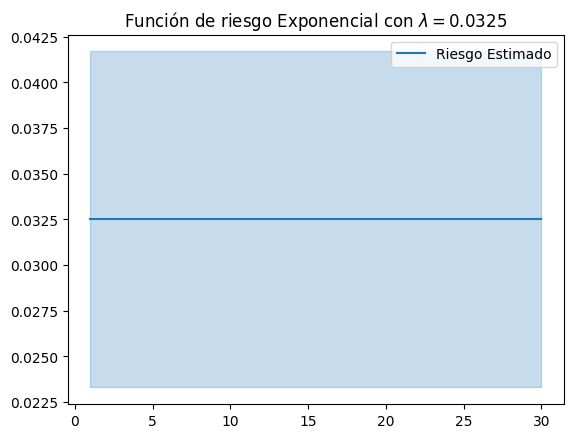

In [11]:
exp.plot_hazard(label='Riesgo Estimado')
plt.title( 'Función de riesgo Exponencial con $\lambda=0.0325$');

#### c) ¿Cuál es el riesgo de que una empresa quiebre según la función exponencial?

In [12]:
exp.hazard_

,Exponential_estimate
1.000000,0.032498
1.292929,0.032498
1.585859,0.032498
1.878788,0.032498
2.171717,0.032498
...,...
28.828283,0.032498
29.121212,0.032498
29.414141,0.032498
29.707071,0.032498


### PUNTO 4 : WEIBULL

##### a) Ajuste un modelo Weibull de supervivencia

In [13]:
from lifelines import WeibullFitter

In [15]:
mweibull = WeibullFitter().fit(datos_quiebra['tiempo'], datos_quiebra['quebrar'])

In [16]:
mweibull.print_summary()

ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

<lifelines.WeibullFitter:"Weibull_estimate", fitted with 100 total observations, 52 right-censored observations>
   number of observations = 100
number of events observed = 48
           log-likelihood = -204.61
               hypothesis = lambda_ != 1, rho_ != 1

---
          coef   se(coef)   coef lower 95%   coef upper 95%
lambda_  25.46       2.26            21.03            29.89
rho_      1.69       0.20             1.30             2.09

          cmp to     z      p   -log2(p)
lambda_     1.00 10.83 <0.005      88.36
rho_        1.00  3.44 <0.005      10.73
---
AIC = 413.22

#### b) Grafique la función de riesgo

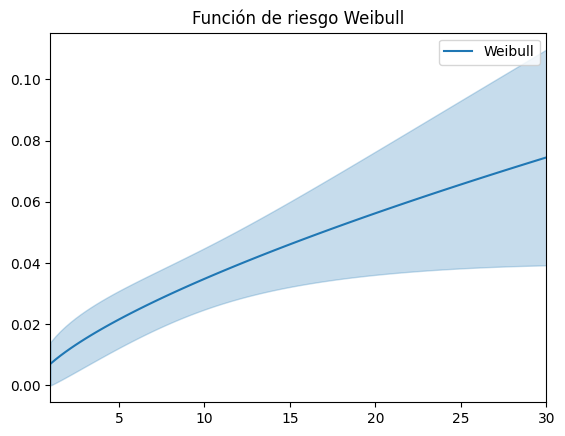

In [22]:
mweibull.plot_hazard(label='Weibull')
plt.title('Función de riesgo Weibull')
plt.xlim(1,30);

#### c) ¿Qué forma tiene la función de riesgo? y ¿qué significa? 

El riesgo es de tipo creciente, con una mayor probabilidad de quebrar con el paso del tiempo, la tasa de riesgo va en aumento en el tiempo, la función de riesgo es menor en los momentos antes de 15 años, pero es mayor en los años posteriores.

### PUNTO 5 : LOGNORMAL

#### a) Ajuste un modelo Log-Normal

In [23]:
from lifelines import LogNormalFitter
mlogn = LogNormalFitter().fit(datos_quiebra['tiempo'], datos_quiebra['quebrar'])

In [26]:
mlogn.print_summary()

ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

<lifelines.LogNormalFitter:"LogNormal_estimate", fitted with 100 total observations, 52 right-censored observations>
   number of observations = 100
number of events observed = 48
           log-likelihood = -210.44
               hypothesis = mu_ != 0, sigma_ != 1

---
         coef   se(coef)   coef lower 95%   coef upper 95%
mu_      3.02       0.13             2.78             3.27
sigma_   0.99       0.10             0.79             1.19

         cmp to     z      p   -log2(p)
mu_        0.00 24.04 <0.005     421.80
sigma_     1.00 -0.11   0.91       0.14
---
AIC = 424.87

#### b) Grafique la función de riesgo 

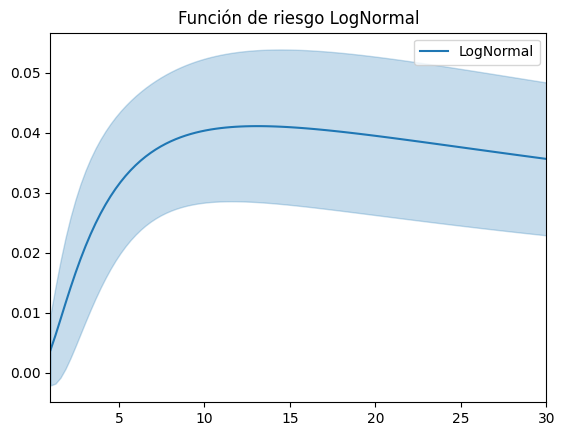

In [28]:
mlogn.plot_hazard(label='LogNormal')
plt.title('Función de riesgo LogNormal')
plt.xlim(1,30);

#### c) En qué periodo el riesgo de quebrar es creciente y en cuál decreciente?

El riesgo de quebrar es creciente del periodo 1 al 10, y es decreciente del periodo 10 al 30. 

### PUNTO 6 : KAPLAN-MEIER

#### a) Estime   la   función   de   supervivencia   y   la   mediana   de   tiempo   de supervivencia y diga que significa.

In [30]:
# Librería Especializada
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

In [31]:
# Modelo Kaplan-Meier
km1 = KaplanMeierFitter().fit(datos_quiebra['tiempo'],datos_quiebra['quebrar'])

In [32]:
km1.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,100,100
1.0,2,1,1,0,100
2.0,6,3,3,0,98
3.0,5,3,2,0,92
4.0,2,0,2,0,87
5.0,2,1,1,0,85
7.0,4,4,0,0,83
8.0,9,4,5,0,79
9.0,3,0,3,0,70


In [33]:
km1.survival_function_

,KM_estimate
timeline,
0.0,1.000000
1.0,0.990000
2.0,0.959694
3.0,0.928400
4.0,0.928400
5.0,0.917477
7.0,0.873261
8.0,0.829046
9.0,0.829046


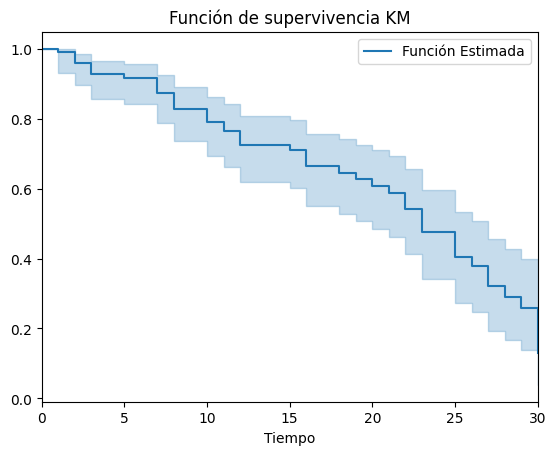

In [35]:
# Gráfica
km1.plot_survival_function(label='Función Estimada')
plt.title('Función de supervivencia KM')
plt.xlabel('Tiempo')
plt.xlim(0,30);

Al graficar la función de supervivencia, se observa que es de tipo decreciente, el valor de la mediana es de aproximadamente 22 años de acuerdo a la estimación, significa que pasan 22 años desde las creaciones de las empresas, en el que la mitad de esas empresas aún no están en quiebra. 

#### b) Estime  la  función  de  supervivencia  por  Kaplan-meier  para  hombres  y mujeres  y  grafique  con .plot_survival_function(ci_show=False) y  diga  si  las empresas administradas por hombres/mujeres quiebran más rápido.

In [36]:
## Dividir datos
Mujeres = datos_quiebra.query('mujer==1')
Hombres = datos_quiebra.query('mujer==0')

In [37]:
Mujeres.head()

,tiempo,mujer,quebrar
1,16,1,0
2,26,1,1
3,17,1,0
4,29,1,1
7,25,1,1


In [38]:
Hombres.head()

,tiempo,mujer,quebrar
0,21,0,1
5,12,0,0
6,11,0,0
8,8,0,0
11,1,0,0


In [39]:
## Estimar funciones de supervivencia para mujeres y hombres
km_mujer = KaplanMeierFitter().fit(Mujeres['tiempo'],Mujeres['quebrar'])
km_hombre = KaplanMeierFitter().fit(Hombres['tiempo'],Hombres['quebrar'])

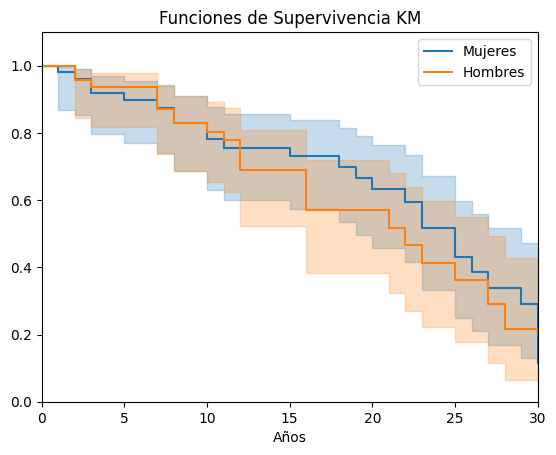

In [42]:
## Graficar
km_mujer.plot_survival_function(label='Mujeres')
km_hombre.plot_survival_function(label='Hombres')
plt.title('Funciones de Supervivencia KM')
plt.xlim(0,30)
plt.ylim(0,1.1)
plt.xlabel('Años');

Observando la gráfica, las dos funciones son decrecientes, van de la par una con la otra en la mayoría del tiempo, entonces se podría decir que muy probablemente no importa el género de la persona que administre la empresa, a lo largo del tiempo ésta puede quebrar de igual manera. 

#### c) El profesor cree que las empresas fundadas por hombres quiebran más rápido,   refute   o   confirme   con   evidencia   estadística   tal   afirmación (pruebas de hipótesis, graficas, tablas etc.)

Para verificar que las funciones de supervivencia son distintas realizaremos una prueba de hipótesis (log rank test)

**log rank test**

$Ho: S(1)=S(2) $ Funciones de supervivencia idénticas,

$Ha: S(1)\neq S(2) $ Funciones de supervivencia distintas


In [44]:
# gpo1 mujeres, gpo2 hombres
LRT = logrank_test(Mujeres['tiempo'], Hombres['tiempo'], Mujeres['quebrar'], Hombres['quebrar'])
LRT.print_summary()

ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.28 0.59      0.75

In [45]:
print(LRT.p_value.round(4))

0.5935


In [52]:
print('Como pvalue =', LRT.p_value.round(3), '>', 0.05, '\nNo rechazamos Ho, significa que \nlas funciones de supervivencia son idénticas, \npor lo tanto las empresas administradas por hombres o por mujeres pueden quebrar igual de rápido.')

Como pvalue = 0.594 > 0.05 
No rechazamos Ho, significa que 
las funciones de supervivencia son idénticas, 
por lo tanto las empresas administradas por hombres o por mujeres pueden quebrar igual de rápido.
